ArtGlleryProblem

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

---
poligonos
---

In [2]:
peine = [ [1,0,0],[12, 0, 1],[11, 3, 2],[10, 1, 3],[9, 1, 4],[8, 3, 5],[7, 1, 6],[6, 1, 7],[5, 3, 8],[4, 1, 9],[3, 1, 10],[2, 3, 11], ] 
poligono1 = [ [ 2.23 , 6.06 , 0 ],[ 6.26 , 2.16 , 1 ],[ 12.23 , 6.24 , 2 ],[ 14.89 , 2.87 , 3 ],[ 19.98 , 8.609 , 4 ],[ 14.54 , 8.72 , 5 ],[ 13.77 , 13.63 , 6 ],[ 9.101 , 6.06 , 7 ],[ 5.01 , 7.89 , 8 ],[ 6.202 , 12.454 , 9 ]]
poligono2 = [ [16.3,16.5,0], [24,6.5,1],[29.3,17.98,2],[22.5,27.97,3],[5.4,12.2,4],[2,23,5],[3,6.7,6]]
ejemplo_mini = [[2.49,2.74,0],[-2,3.6,1],[-1.18,0.8,2],[-4,-2,3],[-1,-3,4],[0.9,1.15,5],[4,-2,6],[6.5,3,7]]

In [3]:
def grafica_poligono(vertices):
  plt.show()
  x = [] ; y = [] ; ids = []
  for p in vertices:
    ids.append(p[2])
    x.append(p[0])
    y.append(p[1])

  x.append(vertices[0][0])
  y.append(vertices[0][1])

  plt.plot(x,y, linewidth=1, color = "black")
  
  for i, txt in enumerate(ids):
    plt.annotate(str(txt) , (x[i],y[i]) )

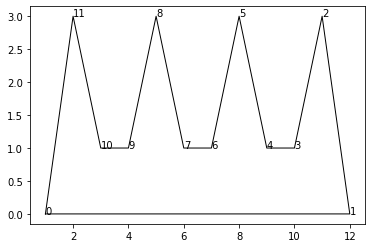

In [4]:
grafica_poligono(peine)

---
miscelaneo
---

In [5]:
def distancia(p1,p2):
  return np.sqrt((p2[1] -p1[1])**2 + (p2[0]-p1[0])**2)

def area(t1,t2,t3):
  a = angulo(t1,t2,t3) * math.pi/180
  l1 = distancia(t1,t2)
  l2 = distancia(t2,t3)
  return abs(math.sin(a)*l1*l2/2)

def dentro(p1, t1,t2,t3):
  a1 = area(p1,t1,t2) ; a2 = area(p1,t2,t3) ; a3 = area(p1,t1,t3) ; a = area(t1,t2,t3)
  if abs(a - (a1+a2+a3)) < 10**-3:
    return True  
  return False

def vacio(i, V):
  vrtx = np.copy(V) ; n = len(V)
  for p in vrtx:
    if p[0] == V[(i-1)%n][0] and p[1] == V[(i-1)%n][1] or p[0] == V[i][0] and p[1] == V[i][1] or p[0]== V[(i+1)%n][0] and p[1]== V[(i+1)%n][1]:
      continue
    if dentro(p,V[(i-1)%n],V[i],V[(i+1)%n]):
      return False
  return True 

def colineales(p1, p2, p3): 
    return (p2[0] - p1[0])*(p3[1] - p1[1]) == (p3[0] - p1[0])*(p2[1]- p1[1])

# parte de esta función fue basada en https://riptutorial.com/math/example/25158/calculate-angle-from-three-points
def angulo(p3,p1,p2): #regresa el ángulo en sentido antihorario p3p1p2
  if colineales(p3,p1,p2):
    if p3[0] < p1[0] and p1[0] < p2[0] or p3[0] > p1[0] and p1[0] > p2[0]:
      return 180 
    if p3[1] > p1[1] and p1[1]>p2[1] or p3[1] < p1[1] and p1[1]<p2[1]:   #p1[0] == p2[0] and p1[0] == p3[0] and 
      return 180
    return 0
  n = p2[1]*(p1[0]-p3[0]) + p1[1]*(p3[0]-p2[0]) + p3[1]*(p2[0]-p1[0])
  d = (p2[0]-p1[0])*(p1[0]-p3[0]) + (p2[1]-p1[1]) * (p1[1]-p3[1])
  if d == 0:
    if n < 0:
      return 90
    return 270
  r = math.atan(n/d) * 180/math.pi  
  if n < 0 and d > 0:
    r = 180 -r
  if n > 0 and d < 0:
    r = abs(r)
  if n > 0 and d > 0:
    r = 180-r
  if n < 0 and d < 0:
    r = 360 - r
  return r

def real_index(vertices,j):
  for v in vertices:
    if v[2] == j:
      return vertices.index(v)
  return 0

def regresa_vertices(V):
  a =[]
  for v in V:
    a.append(v[2])
  return a

def isConvex(v1,v,v2):
  return (v[0] - v1[0]) * (v2[1] - v[1]) - (v2[0]-v[0]) * (v[1]-v1[1]) > 0
def isConvex(v1,v,v2):
  m = np.matrix([[v[0]-v1[0] , v2[0] - v[0] ], [v[1]-v1[1] , v2[1] - v[1] ]])
  return np.linalg.det(m) > 0

---
ear clipping - triangulación
---

In [6]:
def clasifica_vertices(V,j,C,E,R,n):
  for i in range(j,n+j):
    if not isConvex(V[(i-1) % n], V[i %n], V[(i+1) % n]):
      R.append(V[i%n]) #angulo reflex
    else:
      C.append(V[i%n]) #angulo convexo
      if vacio(i%n, V) == True:
        E.append(V[i%n])

def revisar(v,C,E,R,V,n):
  j = real_index(V,v[2])
  if R.count(v) and isConvex(V[(j-1) % n], V[j %n], V[(j+1) % n]):
    R.remove(v)
    C.append(v)
    if vacio(j%n, V) == True:
        E.append(V[j%n])
  if C.count(v) and not isConvex(V[(j-1) % n], V[j %n], V[(j+1) % n]):
    C.remove(v)
    R.append(v)
  C = sorted(C, key = lambda x: int(x[2]))
  R = sorted(R, key = lambda x: int(x[2]))
  E = sorted(E, key = lambda x: int(x[2]))

def punto_triang(v1,v2,v3):
  return [round((v1[0]+v2[0]+v3[0])/3,3) , round((v1[1]+v2[1]+v3[1])/3,3)]

In [7]:
def ear_clipping(vertices,j,T,C,E,R,N):
  n = len(vertices) ; 
  if n == 3:
    #print('Num vertices:',n,'\nAngulos Reflex:',regresa_vertices(R),'. Angulos convexos:',regresa_vertices(C),'. Orejas:',regresa_vertices(E))
    T.append([vertices[0],vertices[1],vertices[2]])
    return
  #grafica_poligono(vertices)
  V = vertices.copy()
  
  if len(T) == 0:
    clasifica_vertices(V,j,C,E,R,n)
  else:
    revisar(V[j-2],C,E,R,V,n)
    revisar(V[j],C,E,R,V,n)
    #print('Num vertices:',n,'\nAngulos Reflex:',regresa_vertices(R),'. Angulos convexos:',regresa_vertices(C),'. Orejas:',regresa_vertices(E))
  
  if len(E) > 0:
    T.append([V[(real_index(V,E[0][2])-1)%n],V[(real_index(V,E[0][2]))%n],V[(real_index(V,E[0][2])+1)%n]])
    #print(V[(real_index(V,E[0][2])-1)%n],V[(real_index(V,E[0][2]))%n],V[(real_index(V,E[0][2])+1)%n])
    j = (real_index(V,E[0][2])+1) % (n-1)
    V.remove(E[0])
    #print('Elimina',E[0][2])
    E.remove(E[0])
    ear_clipping(V,j,T,C,E,R,N)

  if n < N:
    return
  grafica_poligono(vertices)
  i = 0
  for p in T:
    #grafica_poligono([p[0],p[1],p[2]])
    x = [p[0][0],p[2][0]]
    y = [p[0][1],p[2][1]]
    plt.plot(x,y, linewidth=1, color = "black")
    plt.plot(punto_triang(p[0],p[1],p[2])[0],punto_triang(p[0],p[1],p[2])[1], marker="+", color="mediumvioletred")
    #p.append(punto_triang(p[0],p[1],p[2]))
    i = i+1
  return T

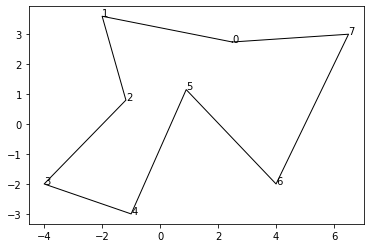

In [8]:
grafica_poligono(ejemplo_mini)

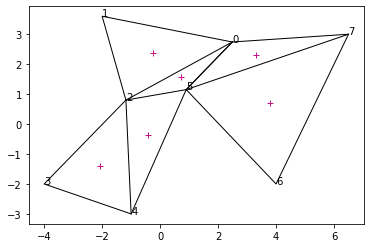

In [9]:
T = [] ; C = [] ; E = [] ; R = []
ec = ear_clipping(ejemplo_mini,0,T,C,E,R,len(ejemplo_mini))

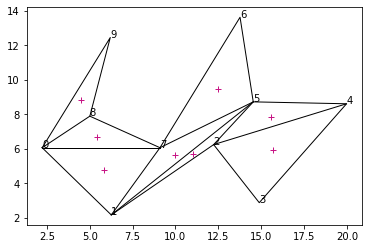

In [10]:
T = [] ; C = [] ; E = [] ; R = []
T1 = ear_clipping(poligono1,0,T,C,E,R,10)

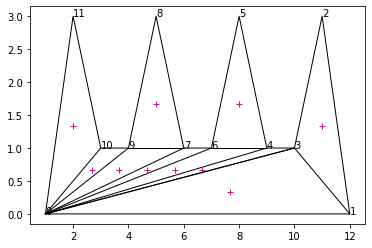

In [11]:
T = [] ; C = [] ; E = [] ; R = []
Tp = ear_clipping(peine,10,T,C,E,R,len(peine))

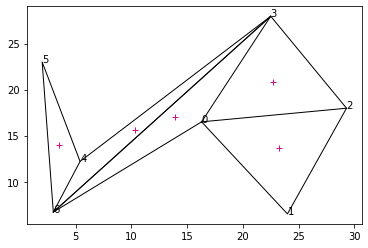

In [12]:
T = [] ; C = [] ; E = [] ; R = []
T2 = ear_clipping(poligono2,0,T,C,E,R,len(poligono2))

---
galeria de arte
---

In [13]:
def adyacente(t,t1):
  if t.count(t1[0]) + t.count(t1[1]) + t.count(t1[2]) == 2:
    return True
  return False

def DFS(T,r,A):
  n = len(T) ; r = r%n ; A.append(T[r])
  if len(A) == len(T):
    return
  for t in T:
    if A.count(t)==1:
      continue
    if adyacente(t,T[r]):
      DFS(T,T.index(t),A)
  return  

def vecinos(v,T):
  ve = []
  for t in T:
    if t != v:
      ve.append(t)
  return ve

def colorea(t,C): # t = triangulo
  if len(C[0]) + len(C[1]) + len(C[2]) == 0:
    C[0].append(t[0])
    #print('0',t[0])
    C[1].append(t[1])
    #print('1',t[1])
    C[2].append(t[2])
    #print('2',t[2])
  else:
    for v in t:
      if C[0].count(v) + C[1].count(v) + C[2].count(v) > 0: #ya coloreado
        continue
      ve = vecinos(v,t)
      for c in C:
        if c.count(ve[0]) + c.count(ve[1]) == 0:
          c.append(v)     
          #print(C.index(c),v)   

def imprime_coloracion(C,col):
  for p in C:
    plt.plot(p[0],p[1], marker="D", color = col)

In [14]:
def galeria_arte(V):
  T = [] ; C = [] ; E = [] ; R = [] ; Tr = []
  T1 = ear_clipping(V,0,T,C,E,R,len(V))
  DFS(T1,0,Tr)
  c1 = [] ; c2 = [] ; c3 = []
  colores = [c1,c2,c3]
  for t in Tr:
    colorea(t,colores)
  imprime_coloracion(c1,"#82C73C")
  imprime_coloracion(c2,"#3CC7C7")
  imprime_coloracion(c3,"#823CC7")
  for c in colores:
    if len(c) == min(len(colores[0]),len(colores[1]),len(colores[2])):
      print('Coloca camaras en vertices:',)
      for v in c:
        print(v[2])
      break

Coloca camaras en vertices:
2
7


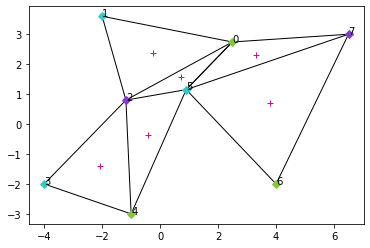

In [15]:
galeria_arte(ejemplo_mini)

Coloca camaras en vertices:
2
7
9


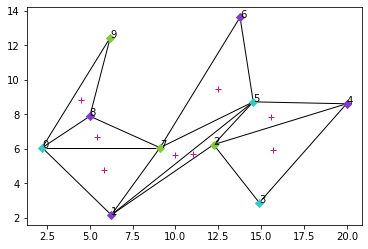

In [16]:
galeria_arte(poligono1)

Coloca camaras en vertices:
0
4


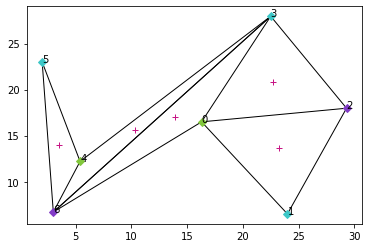

In [17]:
galeria_arte(poligono2)

Coloca camaras en vertices:
1
4
7
10


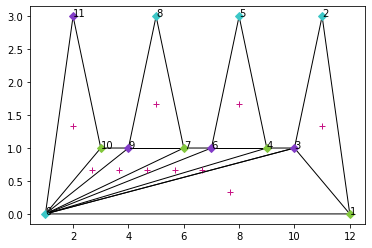

In [18]:
galeria_arte(peine)

In [19]:
peine2 =[[0, 0,0],
 [-1, 3,1],
 [-2, 1,2],
 [-3, 3,3],
 [-4, 1,4],
 [-5, 3,5],
 [-6, 1,6],
 [-7, 3,7],
 [-8, 1,8],
 [-9, 3,9],
 [-10, 1,10],
 [-11, 3,11],
 [-12, 1,12],
 [-13, 3,13],
 [-14, 0,14]]

Coloca camaras en vertices:
1
4
8
12


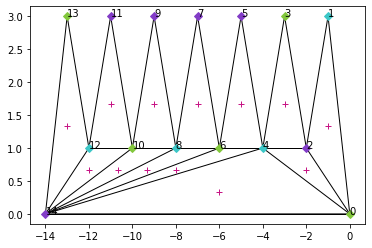

In [20]:
galeria_arte(peine2)